/Users/yukiharuta/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


9 files were found

1: 240226_AY4_0.2mmh


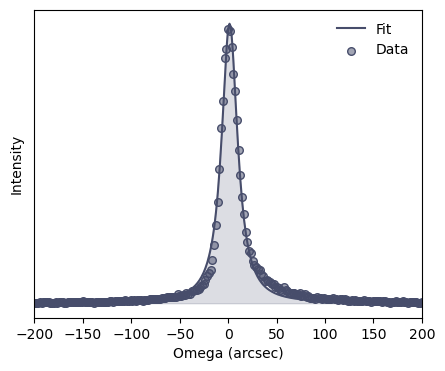

FHWM: 19.79, R2: 0.9912
COMPLETE

2: 240228_AY2_0.2mmh


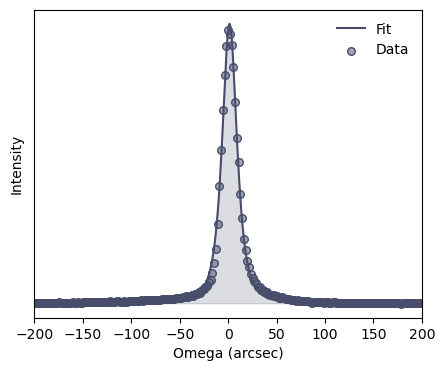

FHWM: 17.90, R2: 0.9954
COMPLETE

3: 240228_AY3_0.2mmh


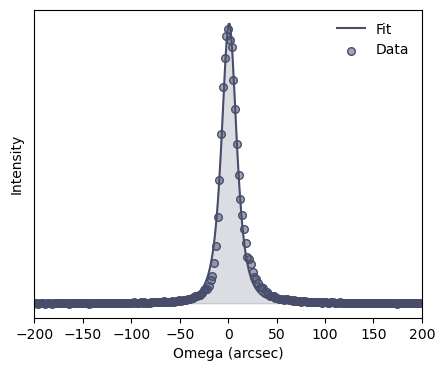

FHWM: 18.28, R2: 0.9916
COMPLETE

4: 240228_AY4_0.2mmh-FALSE


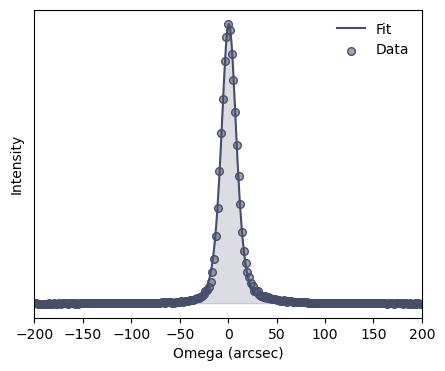

FHWM: 18.23, R2: 0.9978
COMPLETE

5: 240228_A_0.2mmh-FALSE


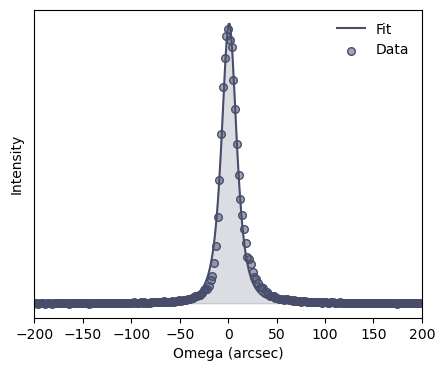

FHWM: 18.28, R2: 0.9916
COMPLETE

6: 240304_AY1_0.5mmh-FALSE


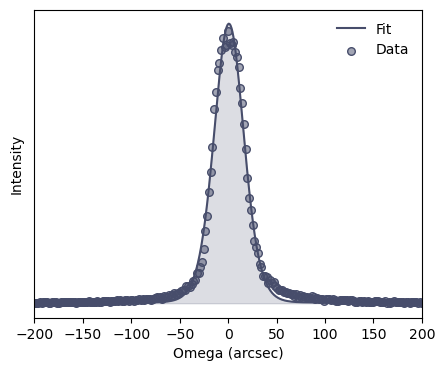

FHWM: 36.22, R2: 0.9925
COMPLETE

7: 240304_AY2_0.5mmh-FALSE


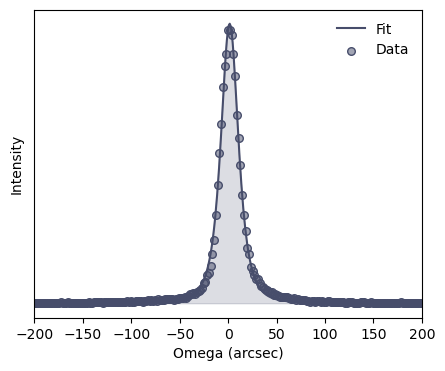

FHWM: 21.27, R2: 0.9969
COMPLETE

8: 240304_AY3_0.5mmh-FALSE


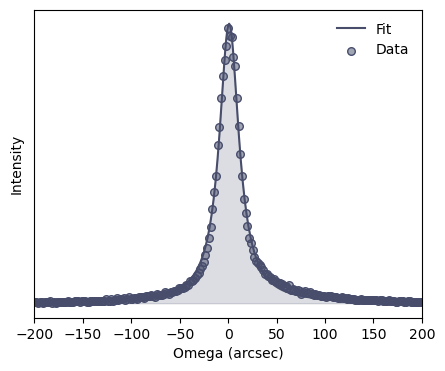

FHWM: 24.67, R2: 0.9966
COMPLETE

9: 240304_A_0.5mmh-FALSE


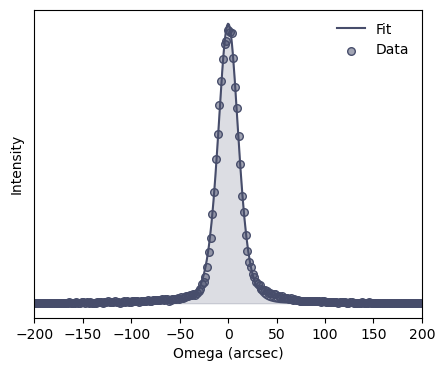

FHWM: 24.61, R2: 0.9970
COMPLETE

DONE


,ID,Date,FALSE,C0,SV,Kp,Ki,Kd,Inf(0),SyD,...,#Crys,Mass,tot_Inf,tot_Eva,Last_C,PV,Stability,Crack,FWHM,R2
0,240226_AY4_0.2mmh,240226,0,41,0.2,3,0.5,2,3.4,26.70,...,132,3.450,82.28,85.99,40.45,0.135663,0.093726,None,19.793952,0.991173
1,240228_AY2_0.2mmh,240228,0,41,0.2,3,0.5,2,3.2,31.75,...,67,2.496,116.81,120.76,41.16,0.149089,0.034593,None,17.902413,0.995360
2,240228_AY3_0.2mmh,240228,0,41,0.2,3,0.5,2,3.2,31.75,...,49,0.765,104.31,105.36,40.98,0.127416,0.229094,None,18.278275,0.991555
3,240228_AY4_0.2mmh-FALSE,240228,1,41,0.2,3,0.5,2,3.2,31.75,...,98,2.336,111.05,114.55,41.06,None,0.028486,None,18.230667,0.997839
4,240228_A_0.2mmh-FALSE,240228,1,41,0.2,3,0.5,2,3.2,31.75,...,104,1.273,104.14,104.81,40.51,0.171221,0.025123,None,18.278275,0.991555
5,240304_AY1_0.5mmh-FALSE,240304,1,41,0.5,3,0.5,2,3.2,31.75,...,169,5.097,56.41,65.80,41.99,0.326739,0.352430,None,36.221416,0.992512
6,240304_AY2_0.5mmh-FALSE,240304,1,41,0.5,3,0.5,2,3.2,31.75,...,65,6.479,52.78,65.81,42.89,0.365105,0.108519,None,21.272643,0.996909
7,240304_AY3_0.5mmh-FALSE,240304,1,41,0.5,3,0.5,2,3.2,31.75,...,75,7.834,42.69,60.55,44.63,None,7.709111,None,24.671395,0.996564
8,240304_A_0.5mmh-FALSE,240304,1,41,0.5,3,0.5,2,3.2,31.75,...,176,7.919,44.55,54.83,40.44,None,0.268197,None,24.614619,0.996965


In [1]:
'''
Make a summary from excel files
'''

import glob
import pandas as pd
import os
import numpy as np
import openpyxl
import datetime
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import wofz, gamma
from sklearn.metrics import r2_score
from statistics import stdev

test_option = False
check_ID = 126

# Source Data
dir_path = "../Data/00_FRC-excels"
crack_info_path = "../Data/02_VISIBLE-DEFECTS.xlsx"
false_analysis_path = "../Data/03_FALSE_Analysis.xlsx"
XRC_dir = "../Data/04_XRC"

# Specify the directory path
excel_list = [f for f in glob.glob(f'{dir_path}/*.xlsx') if '$' not in f] # glab excels
excel_list.sort()

# crack information
crack_info_dict = pd.read_excel(crack_info_path, usecols=["ID", "Crack"]).set_index("ID").to_dict()["Crack"]
# df_crack = pd.read_excel(crack_info_path)
# crack_ID = df_crack['ID'].to_list()
# crack_check = df_crack['Crack'].to_list()

# X-ray rocking curve data
XRC_files = [f for f in glob.glob(f'{XRC_dir}/*.csv') if '$' not in f] # glab csv

# Prepare an empty dataframe for summary
cols = ['ID', 
        'Date',
        'FALSE',
        'C0', 
        'SV', 
        'Kp', 
        'Ki',
        'Kd', 
        'Inf(0)', 
        'SyD', 
        'HT', 
        'RT', 
        'RH', 
        'Evap', 
        'Est_Evap',
        'Dur', 
        'A', 
        'B', 
        'C',
        'L_start',
        'L_end',
        'D_end',
        '#Crys',
        'Mass',
        'tot_Inf',
        'tot_Eva',
        'Last_C',
        'PV',
        'Stability',
        'Crack',
        'FWHM',
        'R2']

cols_ = ['','','1: yes, 0: no',
         'Initial solution concentration (wt%)',
         'Set growth rate (mm/h)', '', '', '',
         'Initial infusion rate (ml/h)',
         'Syringe diameter (mm)',
         'hotplate temperature (C)',
         'Room temperature (C)',
         'Humidity (RH%)',
         'Avg. evaporation rate (g/h)',
         'Estimated evaporation rate (g/h)',
         'Total growth time (h)',
         'Initial seed size A (mm)',
         'Initial seed size B (mm)',
         'Initial seed size C (mm) thickness',
         'sqrt(AB)',
         'Last crystal size from the program (mm)',
         'The thickness of the obtained crystal (mm)',
         'Maximum number of crystals detected from the img',
         'Weight of the deposited crystals (g)',
         'total infusion (g)',
         'total evaporation (g)',
         'last concentration (wt%)',
         'avg. growth rate at the last 3 hours (mm/h)',
         'max(lastG)-min(lastG)',
         'Visible defects in the crystal',
         'FWHM from Pearson VII fitting',
         'Fitting Score']

# Empty dataframe for data
data = pd.DataFrame(index=[], columns=cols)

# Dataframe for the description of the parameters
description = pd.DataFrame(index=cols, columns=['Description'])
for i in range(len(cols_)):
    description.iloc[i, 0] = cols_[i]

# Check how many files were detected
print(f'{len(excel_list)} files were found')

# define the PearsonVII function for the fitting of rocking curves
# https://www.originlab.com/doc/Origin-Help/PearsonVII-FitFunc
def PearsonVII(x, xc, y0, A, mu, w):
    y = y0 + A*(2*gamma(mu)*np.sqrt(2**(1/mu)-1))/np.sqrt(np.pi)/gamma(mu-0.5)/w*(1+4*(2**(1/mu)-1)/w/w*(x-xc)**2)**(-mu)
    return y

# define how to summarize the data
def Make_summary(i, excel_path, data):
    FWHM, R2 = None,None
    try:
        # Read the first sheet
        df = pd.read_excel(excel_path, sheet_name='Data')
        
        if 'FALSE' in excel_path:
            FALSE = 1
        else:
            FALSE = 0
            
        # Read the second and third sheet
        wb = openpyxl.load_workbook(excel_path)
        ws_P = wb["Parameters"]
        ws_I = wb["Information"]

        # Get Information (Parameters)
        ID = os.path.basename(excel_list[i][:-5]) # get ID from the file name YYMMDD_A
        print(f'\n{i+1}: {ID}')
        date = int(ID.split('_')[0]) # The date of the experiment YYMMDD
        system_id = ID.split('_')[0] + '_' + ID.split('_')[1] # YYMMDD_A
        SV = ws_P['I6'].value # Set growth rate (mm/h)
        
        if 'HTSE' in excel_path: # no PID control
            Kp = 0
            Ki = 0
            Kd = 0
        else:
            Kp = ws_P['I8'].value # Kp
            Ki = ws_P['I9'].value # Ki
            try:
                Ki = float(Ki)
            except:
                pass
            Kd = ws_P['I10'].value # Kd
            
        Inf_0 = ws_P['I5'].value # Initial infusion rate (mL/h)
        SyD = ws_P['I4'].value # Syringe diameter (mm)
        Shot_int = ws_P['C5'].value # Interval between data collection (sec)
        C0 = ws_I['C8'].value # Initial concentration (wt%)
        HT = ws_I['C9'].value # Hotplate temperature (ºC)
        RT = ws_I['C10'].value # Room temperature (ºC)
        RH = ws_I['C11'].value # Humidity (RH%)
        Dur = df.iat[-1,1] # Total growth time (h)
        SEED = ws_I['C7'].value
        try:
            A = float(SEED.split('x')[0]) # Seed size1 (mm)
            B = float(SEED.split('x')[1]) # Seed size2 (mm)
            L_start = np.sqrt(A*B) # Seed size (mm)
        except:
            A, B, L_start = None, None, None
            pass
        try:
            C = float(ws_I['C12'].value) # Seed thickness (mm)
            D_end = float(ws_I['F9'].value) # Crystal thickness (mm)
        except:
            C, D_end = None, None
        
        # Get Information (Results)
        Evap = ws_I['I6'].value # Average evaporation rate (g/h)
        L_end = df['Smth_L (mm)'].to_list()[-1] # Last crystal size (mm)
        Num = max(df['Crystal Number'].to_list()) # number of crystals (mm)
        Crystal_mass = ws_I['F7'].value # Total mass of the deposited crystals (g)
        total_inf = ws_I['I4'].value # total infusion (g)
        total_evap = ws_I['I5'].value # total evaporation (g)
        last_conc = ws_I['I7'].value # Estimated last concentration (wt%)
        
        # find Est_evap
        Est_evap = ws_I['C13'].value # g/h
        
        # for old data
        if Est_evap == None:
            try: 
                last_inf = df['Inf-rate (mL/h)'].to_list()[-1] # Last infusion rate (mL/h)
                last_et = df['e(t)'].to_list()[-1]
                last_dedt = df['de(t)/dt'].to_list()[-1]
                last_int_et = df['int e'].to_list()[-1]
                Est_evap = last_inf - (Kp*last_et + Kd*last_dedt + Ki*last_int_et) # mL/h
                Est_evap = Est_evap * 0.944 # g/h
            except:
                try: # very old data that didn't record int_et
                    last_inf = df['Inf-rate (mL/h)'].to_list()[-1] # Last infusion rate (mL/h)
                    last_et = df['e(t)'].to_list()[-1]
                    last_dedt = df['de(t)/dt'].to_list()[-1]
                    Est_evap = last_inf - (Kp*last_et + Kd*last_dedt) # mL/h
                    Est_evap = Est_evap * 0.944 # g/h
                except:
                    pass

        # PV calculation
        Smth_G = df['Smth_G (mm/h)'].to_list()
        # get the index for the last 3 hour
        time_list = df['Time (h)'].to_list()
        for t in time_list:
            if time_list[-1] - t > 3:
                time_index = time_list.index(t)
        last_G = Smth_G[time_index:] #cut the last 3 hour
        PV = sum(last_G)/len(last_G) # average growth rate at the last 3 hours (mm/h)
        
        if FALSE == 1:
            # guess when merging happened
            L_list = df['Length(mm)'].to_list()
            dL = [L_list[i+1] - L_list[i] for i in range(len(L_list)-1)]
            time_merge = time_list[dL.index(max(dL))]
            if Dur - time_merge > 3.2: # if merging doesn't affect on the sPV calculation
                pass
            else:
                PV = None # Do not use PV

        # Stability score
        Stability = max(last_G)-min(last_G)
        
        # Crack
        Crack = crack_info_dict.get(system_id)
        
        wb.close()

        # Get the 100-omega rocking curve data
        for RC in XRC_files:
            # Find the corresponding RC data
            if str(system_id) in RC:
                # Read csv files
                df_RC = pd.read_csv(RC)
                x = df_RC['NORM_omega'].to_list()
                x = [n*3600 for n in x]
                y = df_RC['NORM'].to_list()

                # initial guess for the parameters of the first peak
                xc_guess = 0
                y0_guess = 0
                A_guess = 30
                mu_guess = 1.0
                w_guess = 30

                # define the range of x-values to fit over
                x_min = np.min(x)
                x_max = np.max(x)

                try:
                    # fit the PearsonVII function to the data
                    popt, pcov = curve_fit(PearsonVII, x, y, p0=[xc_guess, y0_guess, A_guess, mu_guess, w_guess])
                    X = np.arange(x_min,x_max,1)

                    # calculate R-squared value
                    y_fit = PearsonVII(x, *popt)
                    R2 = r2_score(y, y_fit)

                    # Fitted Parameters
                    xc_fit, y0_fit, A_fit, mu_fit, w_fit = popt

                    # Extract FWHM and FWXM (full-width at X% maximum)
                    FWHM = w_fit

                    # plot the fitted function and the data
                    fig = plt.figure(figsize=(5,4))
                    plt.plot(X, PearsonVII(X, *popt), color='#474D6B', label='Fit')
                    plt.fill_between(X, PearsonVII(X, *popt), color='#474D6B30')
                    plt.scatter(x, y, c='#474D6B80',ec='#474D6B', label='Data', s=30)
                    plt.legend(frameon=False)
                    plt.xlabel('Omega (arcsec)')
                    plt.ylabel('Intensity')
                    plt.xlim(-200,200)
                    plt.yticks([])
                    plt.show()

                    print(f'FHWM: {FWHM:.2f}, R2: {R2:.4f}')
                    
                    break

                except Exception as e:
                    print(e)
                    FWHM, R2 = 'Fit Fail',None
                    break
            
            else:
                FWHM, R2 = 'N/A', None
            
        # Dataframe for the parameters
        record = [[ID, date, FALSE, C0, SV, Kp, Ki, Kd, Inf_0, SyD, HT, RT, RH, Evap, Est_evap, Dur, A, B, C, L_start,
        L_end, D_end, Num, Crystal_mass, total_inf, total_evap, last_conc, PV, Stability, Crack, FWHM, R2]]
        df_record = pd.DataFrame(data=record, columns=cols)
        # Add one row
        data = pd.concat([data, df_record], ignore_index=True, axis=0)

        FWHM, R2 = None,None # Initialize

        print(f'COMPLETE')

    except Exception as e:
        print(f'ERROR')
        print(e)
        record = [[ID, float(ID[:6])]]
        for i in range(len(cols)-2):
            record[0].append(None)
        df_record = pd.DataFrame(data=record, columns=cols)
        data = pd.concat([data, df_record], ignore_index=True, axis=0)
        pass
    
    return data
                 
FWHM, R2 = None,None
# Get data from each experiment
for i, file in enumerate(excel_list):
    
    if not test_option:
        data = Make_summary(i, file, data)
    
    if test_option and i == check_ID-1:
        data = Make_summary(i, file, data)

print('\nDONE')

if not test_option:
    # Save the data
    with pd.ExcelWriter(f'../Data/01_SUMMARY.xlsx') as writer:
        data.to_excel(writer, sheet_name='Data')
        description.to_excel(writer, sheet_name='Description')

data